<a href="https://colab.research.google.com/github/kabulezhoushen/blender-mcp/blob/main/%E7%AD%9B%E9%80%89%E8%82%A1%E7%A5%A8%E6%B5%8B%E8%AF%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  33 of 33 completed


缺失值统计：
Ticker
0175.HK    0
0232.HK    0
0267.HK    0
0554.HK    0
0580.HK    0
0595.HK    0
0640.HK    0
0686.HK    0
0710.HK    0
0752.HK    0
0788.HK    0
0951.HK    0
1203.HK    0
1289.HK    0
1361.HK    0
1760.HK    0
1766.HK    0
1837.HK    0
1883.HK    0
1985.HK    0
2039.HK    0
2230.HK    0
2314.HK    0
2357.HK    0
2380.HK    0
2386.HK    0
2502.HK    0
2549.HK    3
2883.HK    0
6601.HK    0
6805.HK    0
6823.HK    0
9896.HK    0
dtype: int64

收益率描述性统计：
Ticker     0175.HK     0232.HK     0267.HK     0554.HK     0580.HK  \
count   163.000000  163.000000  163.000000  163.000000  163.000000   
mean      0.002838    0.000591    0.000541    0.002233    0.000212   
std       0.039299    0.050526    0.024662    0.044092    0.040840   
min      -0.209658   -0.224390   -0.126327   -0.183333   -0.203390   
25%      -0.015331   -0.018434   -0.007676   -0.016913   -0.017024   
50%       0.002587    0.000000    0.000000    0.000000    0.000000   
75%       0.028004    0.018350    0.010471 

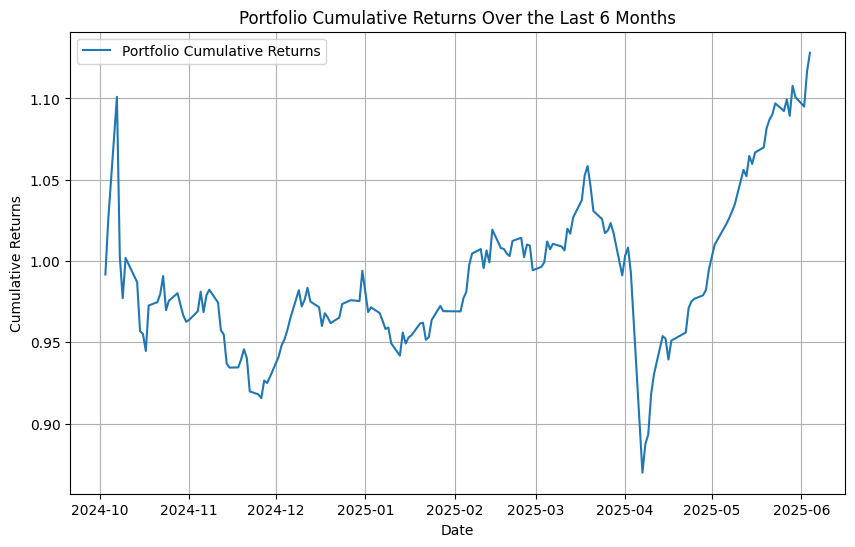

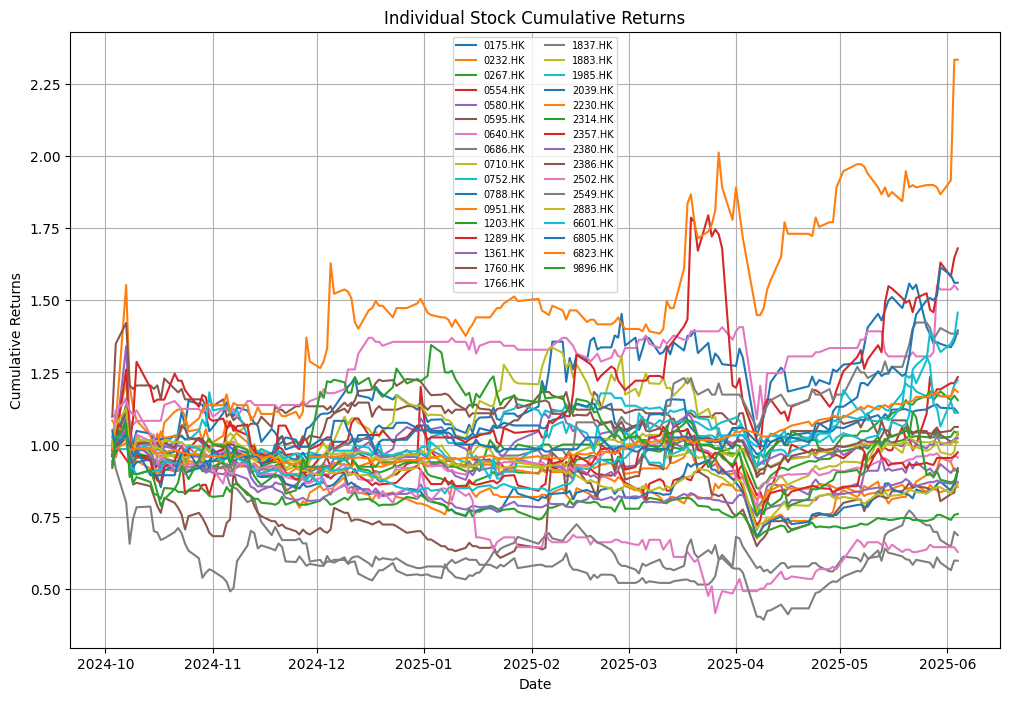


投资组合年化收益率：20.49%
投资组合的年化夏普比率: 0.6587

各股票表现分析:

各股票年化收益率和夏普比率:
        Annualized Return Sharpe Ratio
Ticker                                
2230.HK           270.88%      214.63%
1289.HK           123.08%      136.76%
6805.HK            99.07%      180.76%
0640.HK            94.49%      152.29%
6601.HK            79.05%      141.24%
0175.HK            67.33%      107.54%
1837.HK            65.39%      134.83%
0554.HK            38.42%       74.09%
0752.HK            36.48%      106.81%
6823.HK            29.51%      161.53%
1203.HK            24.76%       74.70%
1985.HK            17.55%       48.00%
0788.HK            17.53%       55.37%
2386.HK             9.58%       30.91%
0710.HK             6.91%       35.04%
0267.HK             6.12%       23.55%
0595.HK             5.39%       29.81%
1361.HK             3.37%       13.24%
1883.HK             1.16%       -2.56%
2357.HK            -4.19%       15.72%
1766.HK            -6.98%      -12.77%
1760.HK           -12.36%       23.60%


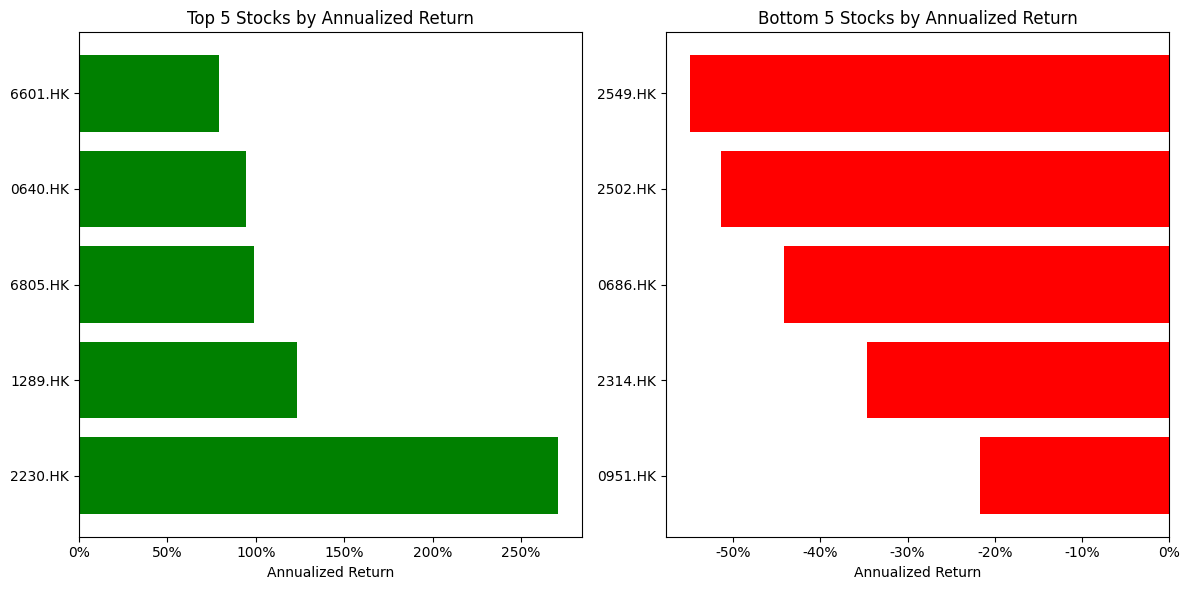

In [51]:
#等权重
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#"0595.HK","1985.HK","0175.HK","1203.HK","1837.HK","0788.HK","1883.HK","6823.HK",
#"0175.HK","0710.HK","0752.HK","1361.HK","1760.HK","2230.HK","2549.HK","6601.HK","9896.HK"
#"0232.HK","0580.HK","0951.HK","1289.HK","1766.HK","2039.HK","2357.HK","6805.HK"
#"2380.HK","0686.HK"
#"2386.HK","2883.HK"
#"0554.HK","2386.HK","2883.HK"
# "0640.HK","2502.HK","2314.HK"
# 股票代码
stock_symbols = ["0595.HK","1985.HK","1203.HK","1837.HK","0788.HK","1883.HK","6823.HK","0175.HK","0710.HK","0752.HK","1361.HK","1760.HK","2230.HK","2549.HK","6601.HK","9896.HK",
                 "0232.HK","0580.HK","0951.HK","1289.HK","1766.HK","2039.HK","2357.HK","6805.HK","2380.HK","0686.HK",
                "2386.HK","2883.HK","0554.HK","0640.HK","2502.HK","2314.HK","0267.HK"]

# 时间区间
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=252)

# 下载数据
data = yf.download(stock_symbols, start=start_date, end=end_date)

# 只选择收盘价
close_prices = data['Close']

# 填充缺失值（向前填充）
close_prices = close_prices.ffill()

# 检查数据缺失
print("缺失值统计：")
print(close_prices.isnull().sum())

# 计算每日收益率 这样算出来是170.59%
returns = close_prices.pct_change(fill_method=None).dropna()
#如果用对数收益率的话，年化收益率是141.59%


# 检查收益率异常
print("\n收益率描述性统计：")
print(returns.describe())

# 等权重
num_stocks = len(stock_symbols)
weights = np.array([1/num_stocks] * num_stocks)

# 投资组合每日收益率
portfolio_returns = returns @ weights

# 投资组合累计收益
cumulative_returns = (1 + portfolio_returns).cumprod()

# 画投资组合累计收益曲线
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio Cumulative Returns')
plt.title('Portfolio Cumulative Returns Over the Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# 画每只股票的累计收益曲线
plt.figure(figsize=(12, 8))
for symbol in returns.columns:
    plt.plot((1 + returns[symbol]).cumprod(), label=symbol)
plt.title("Individual Stock Cumulative Returns")
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()

# 年化收益率（复利公式）
n_days = len(cumulative_returns)
annualized_return = cumulative_returns.iloc[-1] ** (252 / n_days) - 1
print(f"\n投资组合年化收益率：{annualized_return:.2%}")

# 夏普比率
risk_free_rate_annual = 0.04426  # 年化无风险利率
trading_days_per_year = 252
risk_free_rate_daily = risk_free_rate_annual / trading_days_per_year

excess_returns = portfolio_returns - risk_free_rate_daily
mean_excess_return = np.mean(excess_returns)
std_excess_return = np.std(excess_returns, ddof=1)
sharpe_ratio_daily = mean_excess_return / std_excess_return
sharpe_ratio_annual = sharpe_ratio_daily * np.sqrt(trading_days_per_year)

print(f"投资组合的年化夏普比率: {sharpe_ratio_annual:.4f}")

# 计算每支股票的年化收益率和夏普比率
print("\n各股票表现分析:")
stock_performance = pd.DataFrame(index=returns.columns, columns=['Annualized Return', 'Sharpe Ratio'])

for symbol in returns.columns:
    # 计算单支股票累计收益
    stock_cum_return = (1 + returns[symbol]).cumprod()

    # 计算年化收益率
    stock_annualized_return = stock_cum_return.iloc[-1] ** (252 / n_days) - 1

    # 计算夏普比率
    stock_excess_returns = returns[symbol] - risk_free_rate_daily
    stock_mean_excess_return = np.mean(stock_excess_returns)
    stock_std_excess_return = np.std(stock_excess_returns, ddof=1)
    stock_sharpe_ratio_daily = stock_mean_excess_return / stock_std_excess_return
    stock_sharpe_ratio_annual = stock_sharpe_ratio_daily * np.sqrt(trading_days_per_year)

    # 保存结果
    stock_performance.loc[symbol, 'Annualized Return'] = stock_annualized_return
    stock_performance.loc[symbol, 'Sharpe Ratio'] = stock_sharpe_ratio_annual

# 按年化收益率排序
stock_performance_sorted = stock_performance.sort_values(by='Annualized Return', ascending=False)

# 打印结果
print("\n各股票年化收益率和夏普比率:")
print(stock_performance_sorted.to_string(float_format="{:,.2%}".format))

# 可视化表现最好的5只股票和最差的5只股票
plt.figure(figsize=(12, 6))

# 表现最好的5只股票
top_5 = stock_performance_sorted.head(5)
plt.subplot(1, 2, 1)
plt.barh(top_5.index, top_5['Annualized Return'], color='green')
plt.title('Top 5 Stocks by Annualized Return')
plt.xlabel('Annualized Return')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))

# 表现最差的5只股票
bottom_5 = stock_performance_sorted.tail(5)
plt.subplot(1, 2, 2)
plt.barh(bottom_5.index, bottom_5['Annualized Return'], color='red')
plt.title('Bottom 5 Stocks by Annualized Return')
plt.xlabel('Annualized Return')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))

plt.tight_layout()
plt.show()

逆波动率权重： [0.02017808 0.01569453 0.03215478 0.01798498 0.01941711 0.02213976
 0.02577037 0.02198342 0.02009644 0.0433974  0.04404308 0.03639809
 0.04294127 0.01620318 0.03784301 0.01381933 0.03395296 0.03159058
 0.05471642 0.0254437  0.02753087 0.01803747 0.03599951 0.02071629
 0.04889295 0.04005785 0.01809864 0.01568789 0.0313698  0.02776936
 0.03140344 0.09076681 0.01790063]


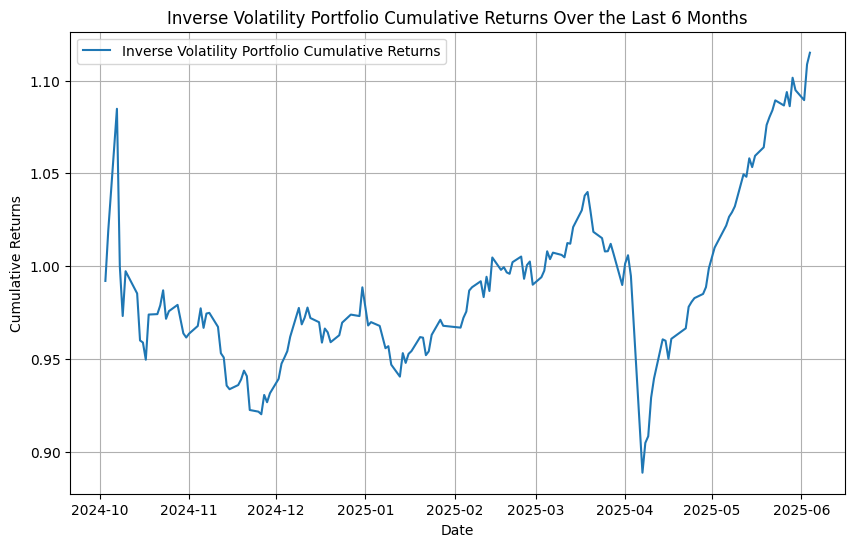

年化收益率：17.78%
投资组合的年化夏普比率: 0.646113183925033


In [52]:
#等风险

# 1. 计算每只股票的年化波动率
annual_volatility = returns.std() * np.sqrt(252)

# 2. 计算逆波动率权重
inv_vol = 1 / annual_volatility
inv_vol_weights = inv_vol / inv_vol.sum()
inv_vol_weights = inv_vol_weights.values  # 转为numpy数组

print("逆波动率权重：", inv_vol_weights)

# 3. 用逆波动率权重计算投资组合每日收益率
portfolio_returns = returns.values @ inv_vol_weights

# 4. 计算累计收益
cumulative_returns = (1 + portfolio_returns).cumprod()

# 5. 可视化累计收益曲线
plt.figure(figsize=(10, 6))
plt.plot(returns.index, cumulative_returns, label='Inverse Volatility Portfolio Cumulative Returns')
plt.title('Inverse Volatility Portfolio Cumulative Returns Over the Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# 6. 年化收益率
annualized_return = (cumulative_returns[-1] - 1) * (252 / len(cumulative_returns))
print(f"年化收益率：{annualized_return:.2%}")

# 7. 年化夏普比率
risk_free_rate_annual = 0.04426
trading_days_per_year = 252
risk_free_rate_daily = risk_free_rate_annual / trading_days_per_year

excess_returns = portfolio_returns - risk_free_rate_daily
mean_excess_return = np.mean(excess_returns)
std_excess_return = np.std(excess_returns, ddof=1)
sharpe_ratio_daily = mean_excess_return / std_excess_return
sharpe_ratio_annual = sharpe_ratio_daily * np.sqrt(trading_days_per_year)
print("投资组合的年化夏普比率:", sharpe_ratio_annual)


各股票权重(与波动率成正比):
Ticker
0175.HK    3.80%
0232.HK    4.88%
0267.HK    2.38%
0554.HK    4.26%
0580.HK    3.95%
0595.HK    3.46%
0640.HK    2.97%
0686.HK    3.49%
0710.HK    3.81%
0752.HK    1.77%
0788.HK    1.74%
0951.HK    2.10%
1203.HK    1.78%
1289.HK    4.73%
1361.HK    2.02%
1760.HK    5.54%
1766.HK    2.26%
1837.HK    2.43%
1883.HK    1.40%
1985.HK    3.01%
2039.HK    2.78%
2230.HK    4.25%
2314.HK    2.13%
2357.HK    3.70%
2380.HK    1.57%
2386.HK    1.91%
2502.HK    4.23%
2549.HK    4.88%
2883.HK    2.44%
6601.HK    2.76%
6805.HK    2.44%
6823.HK    0.84%
9896.HK    4.28%
dtype: object


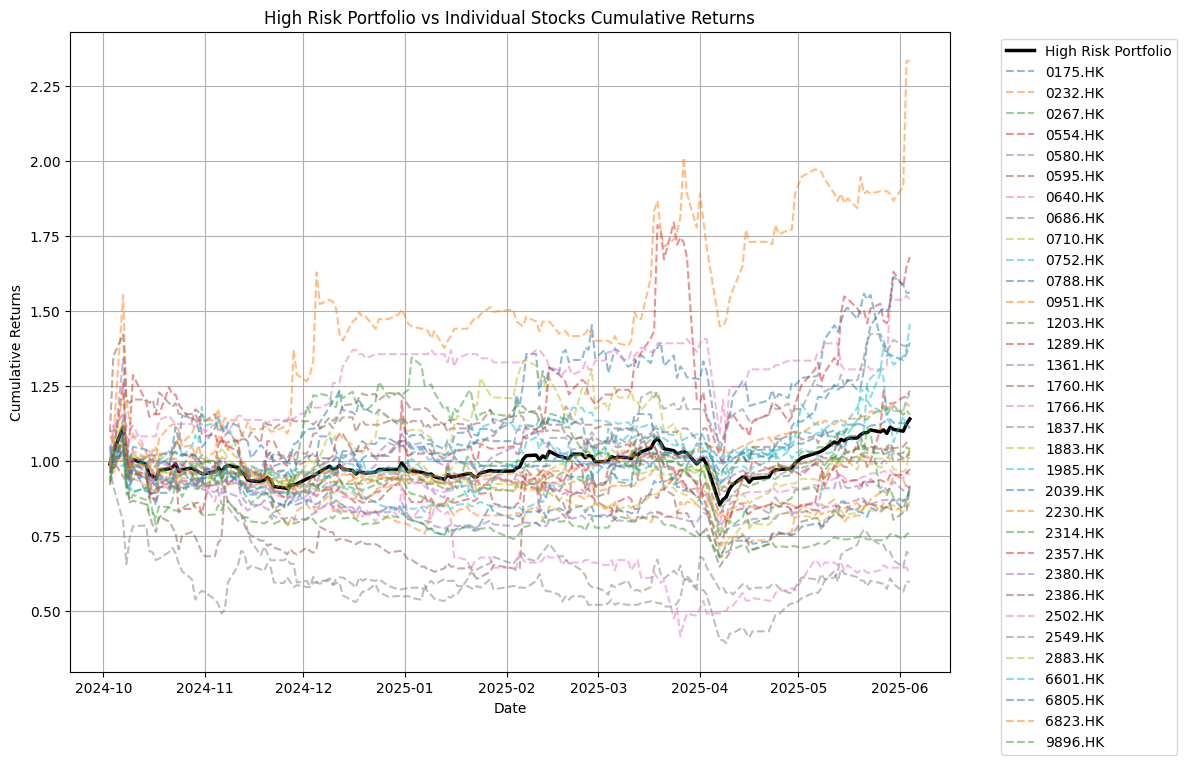


年化收益率:
投资组合: 21.65%

各股票年化收益率:
Ticker
0175.HK     61.08%
0232.HK    -14.05%
0267.HK      6.06%
0554.HK     36.18%
0580.HK    -14.05%
0595.HK      5.34%
0640.HK     83.12%
0686.HK    -48.59%
0710.HK      6.82%
0752.HK     34.45%
0788.HK     17.02%
0951.HK    -22.65%
1203.HK     23.78%
1289.HK    105.18%
1361.HK      3.35%
1760.HK    -12.64%
1766.HK     -7.07%
1837.HK     59.46%
1883.HK      1.16%
1985.HK     17.04%
2039.HK    -14.54%
2230.HK    206.32%
2314.HK    -37.21%
2357.HK     -4.22%
2380.HK    -20.17%
2386.HK      9.42%
2502.HK    -57.65%
2549.HK    -62.35%
2883.HK    -21.08%
6601.HK     70.74%
6805.HK     86.73%
6823.HK     28.15%
9896.HK    -13.66%
Name: 2025-06-04 00:00:00, dtype: object

夏普比率(年化):
投资组合: 0.6709

各股票夏普比率:
0175.HK: 1.0754
0232.HK: 0.1304
0267.HK: 0.2355
0554.HK: 0.7409
0580.HK: 0.0141
0595.HK: 0.2981
0640.HK: 1.5229
0686.HK: -0.8143
0710.HK: 0.3504
0752.HK: 1.0681
0788.HK: 0.5537
0951.HK: -0.6636
1203.HK: 0.7470
1289.HK: 1.3676
1361.HK: 0.1324
1760.HK: 0.2360
1

In [53]:
#加大风险
# 2. 计算权重与波动率成正比
weights = annual_volatility / annual_volatility.sum()
print("\n各股票权重(与波动率成正比):")
print(weights.round(4).apply(lambda x: f"{x:.2%}"))

# 3. 计算投资组合的每日收益率
portfolio_returns = returns.dot(weights)

# 4. 计算投资组合的累计收益
cumulative_returns = (1 + portfolio_returns).cumprod()

# 5. 计算各股票的累计收益
individual_cumulative_returns = (1 + returns).cumprod()

# 6. 可视化投资组合和各股票的累计收益曲线
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='High Risk Portfolio', linewidth=2.5, color='black')

# 绘制各股票累计收益
for stock in returns.columns:
    plt.plot(individual_cumulative_returns[stock],
             alpha=0.5, linestyle='--',
             label=f'{stock}')

plt.title('High Risk Portfolio vs Individual Stocks Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. 计算各股票和组合的年化收益率
annualized_return_portfolio = (cumulative_returns.iloc[-1] - 1) * (252 / len(cumulative_returns))
annualized_returns_stocks = (individual_cumulative_returns.iloc[-1] - 1) * (252 / len(returns))

print("\n年化收益率:")
print(f"投资组合: {annualized_return_portfolio:.2%}")
print("\n各股票年化收益率:")
print(annualized_returns_stocks.round(4).apply(lambda x: f"{x:.2%}"))

# 8. 计算各股票和组合的夏普比率
risk_free_rate_annual = 0.04426
trading_days_per_year = 252
risk_free_rate_daily = risk_free_rate_annual / trading_days_per_year

# 计算组合的夏普比率
excess_returns_portfolio = portfolio_returns - risk_free_rate_daily
sharpe_ratio_daily_portfolio = excess_returns_portfolio.mean() / excess_returns_portfolio.std(ddof=1)
sharpe_ratio_annual_portfolio = sharpe_ratio_daily_portfolio * np.sqrt(trading_days_per_year)

# 计算各股票的夏普比率  #用随机股票模拟测试时夏普比率跟上面算法的夏普一样的
sharpe_ratios = {}
for stock in returns.columns:
    excess_returns = returns[stock] - risk_free_rate_daily
    sharpe_ratio_daily = excess_returns.mean() / excess_returns.std(ddof=1)
    sharpe_ratios[stock] = sharpe_ratio_daily * np.sqrt(trading_days_per_year)

print("\n夏普比率(年化):")
print(f"投资组合: {sharpe_ratio_annual_portfolio:.4f}")
print("\n各股票夏普比率:")
for stock, ratio in sharpe_ratios.items():
    print(f"{stock}: {ratio:.4f}")

# 9. 打印各股票日收益率统计信息
print("\n各股票日收益率统计:")
print(returns.describe().round(6))

# 10. 风险杠杆指标 - 波动率对比
print("\n波动率对比(年化):")
print(f"投资组合: {portfolio_returns.std() * np.sqrt(252):.4f}")
print("\n各股票波动率:")
print(annual_volatility.round(4))

<ipython-input-54-28898de3e646>:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  standardized_factors = scaler.fit_transform(factor_data.fillna(0))
<ipython-input-54-28898de3e646>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_factor_data['weight'] = filtered_factor_data['score'] / filtered_factor_data['score'].sum()


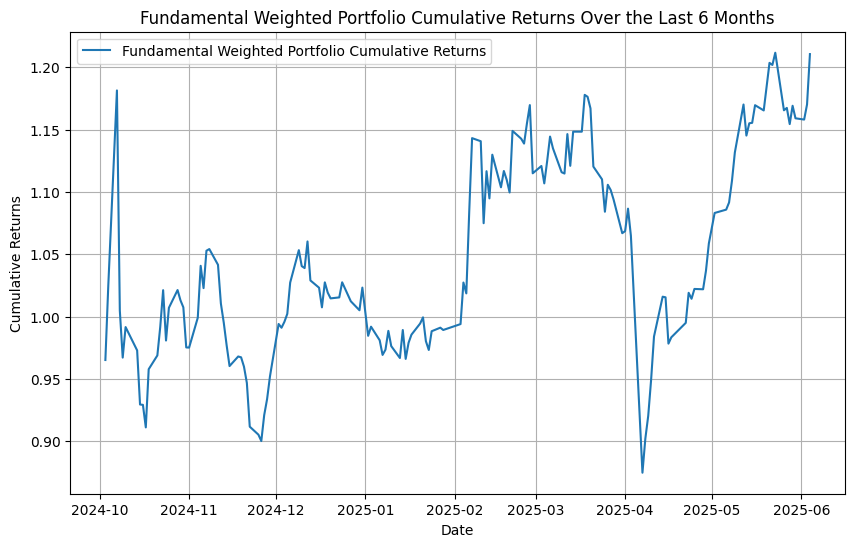

投资组合年化收益率：34.35%
投资组合的年化夏普比率: 0.7622762444062272

每只股票的年化收益率和年化夏普比率：
0175.HK: 年化收益率=67.33%, 年化夏普比率=1.0754
0710.HK: 年化收益率=6.91%, 年化夏普比率=0.3504
1760.HK: 年化收益率=-12.36%, 年化夏普比率=0.2360
2230.HK: 年化收益率=270.88%, 年化夏普比率=2.1463
6601.HK: 年化收益率=79.05%, 年化夏普比率=1.4124
9896.HK: 年化收益率=-13.32%, 年化夏普比率=0.0922
0232.HK: 年化收益率=-13.70%, 年化夏普比率=0.1304
2357.HK: 年化收益率=-4.19%, 年化夏普比率=0.1572
0554.HK: 年化收益率=38.42%, 年化夏普比率=0.7409
2502.HK: 年化收益率=-51.39%, 年化夏普比率=-0.7399
0267.HK: 年化收益率=6.12%, 年化夏普比率=0.2355


In [54]:

from sklearn.preprocessing import StandardScaler



# 初始化因子数据框
factor_data = pd.DataFrame(index=stock_symbols, columns=['value', 'quality', 'volatility', 'size', 'liquidity'])

for symbol in stock_symbols:
    stock_data = data['Close'][symbol]

    # 价值因子：使用价格的倒数作为替代
    value_factor = 1 / stock_data.iloc[-1]

    # 质量因子：使用开盘价与收盘价的比率作为替代
    quality_factor = stock_data.iloc[-1] / data['Open'][symbol].iloc[-1]

    # 波动率因子：标准差
    volatility_factor = stock_data.pct_change().std()

    # 规模因子：使用成交量乘以价格作为替代
    size_factor = data['Volume'][symbol].iloc[-1] * stock_data.iloc[-1]

    # 流动性因子：平均成交量
    liquidity_factor = data['Volume'][symbol].mean()

    # 存储因子
    factor_data.loc[symbol] = [value_factor, quality_factor, volatility_factor, size_factor, liquidity_factor]

# 标准化因子
scaler = StandardScaler()
standardized_factors = scaler.fit_transform(factor_data.fillna(0))
factor_data['score'] = np.mean(standardized_factors, axis=1)

# 过滤掉score<=0的股票
filtered_factor_data = factor_data[factor_data['score'] > 0]

# 计算权重
filtered_factor_data['weight'] = filtered_factor_data['score'] / filtered_factor_data['score'].sum()

# 计算每日收益率
returns = data['Close'].pct_change().dropna()

# 确保只使用有因子得分的股票
returns = returns[filtered_factor_data.index]

# 计算投资组合的每日收益率（用因子加权权重）
portfolio_returns = returns.dot(filtered_factor_data['weight'])

# 计算投资组合的累计收益
cumulative_returns = (1 + portfolio_returns).cumprod()

# 可视化投资组合的累计收益曲线
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Fundamental Weighted Portfolio Cumulative Returns')
plt.title('Fundamental Weighted Portfolio Cumulative Returns Over the Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# 量化评价指标体系--基本面加权
# 1. 年化收益率（修正为复利公式）
n_days = len(cumulative_returns)
annualized_return = cumulative_returns.iloc[-1] ** (252 / n_days) - 1
print(f"投资组合年化收益率：{annualized_return:.2%}")

# 2. 年化夏普比率
risk_free_rate_annual = 0.04426 # 年化无风险利率
trading_days_per_year = 252
risk_free_rate_daily = risk_free_rate_annual / trading_days_per_year

excess_returns = portfolio_returns - risk_free_rate_daily
mean_excess_return = np.mean(excess_returns)
std_excess_return = np.std(excess_returns, ddof=1)
sharpe_ratio_daily = mean_excess_return / std_excess_return
sharpe_ratio_annual = sharpe_ratio_daily * np.sqrt(trading_days_per_year)

print("投资组合的年化夏普比率:", sharpe_ratio_annual)

# =========================
# 新增：每只股票的年化收益率和夏普比率
# =========================

print("\n每只股票的年化收益率和年化夏普比率：")
for symbol in returns.columns:
    stock_ret = returns[symbol]
    # 年化收益率（复利公式）
    stock_cum = (1 + stock_ret).cumprod()
    n_days_stock = len(stock_cum)
    annual_ret = stock_cum.iloc[-1] ** (252 / n_days_stock) - 1

    # 年化夏普比率
    excess_ret = stock_ret - risk_free_rate_daily
    mean_excess = np.mean(excess_ret)
    std_excess = np.std(excess_ret, ddof=1)
    if std_excess != 0:
        sharpe_daily = mean_excess / std_excess
        sharpe_annual = sharpe_daily * np.sqrt(trading_days_per_year)
    else:
        sharpe_annual = np.nan

    print(f"{symbol}: 年化收益率={annual_ret:.2%}, 年化夏普比率={sharpe_annual:.4f}")

  #结果只显示了14只股票的年化收益率和夏普比率，原因是计算投资组合和输出单只股票指标时，只保留了因子得分（score）大于0的股票
  #组合夏普比率（2.80）高于最好的单只股票（2.47），说明组合分散效果好，成分股之间相关性较低，组合的波动率被大大降低。

